In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
officeimg = '/content/drive/MyDrive/2025_SeSAC/deep_learning/data/office.jpg'
tflite_f = '/content/drive/MyDrive/2025_SeSAC/deep_learning/data/lite-model_efficientdet_lite0_detection_default_1.tflite'

In [5]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(tflite_f)
interpreter.get_input_details() # 모델의 입력 텐서 정보

[{'name': 'serving_default_images:0',
  'index': 0,
  'shape': array([  1, 320, 320,   3], dtype=int32),
  'shape_signature': array([  1, 320, 320,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 127),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([127], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [6]:
interpreter.get_output_details() # 모델의 출력 텐서 정보

[{'name': 'StatefulPartitionedCall:3',
  'index': 598,
  'shape': array([], dtype=int32),
  'shape_signature': array([], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'StatefulPartitionedCall:2',
  'index': 599,
  'shape': array([], dtype=int32),
  'shape_signature': array([], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'StatefulPartitionedCall:1',
  'index': 600,
  'shape': array([], dtype=int32),
  'shape_signature': array([], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dty

(1, 320, 320, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

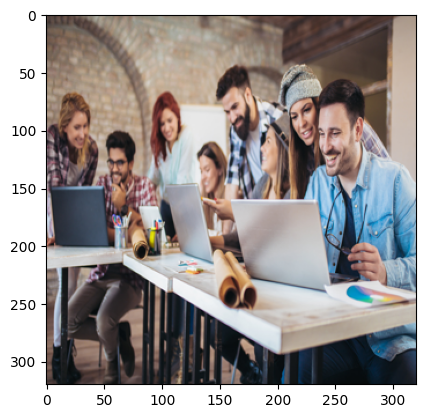

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(officeimg)
img = img.resize((320, 320))
ndimg = np.array(img)[np.newaxis,:,:,:] # 모델의 입력 텐서 정보에 맞게 배치 크기 1짜리 4차원 텐서로 확장 -> (1, 320, 320, 3)
print(ndimg.shape)
plt.imshow(ndimg[0])
plt.show

In [30]:
interpreter.allocate_tensors() # 모델의 메모리 공간을 할당, 최초 1번은 호출해야
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], ndimg) # 입력 데이터를 모델에 넣어줘
interpreter.invoke() # 모델 실행

In [35]:
output = []
for i in range(4):
  output.append(interpreter.get_tensor(interpreter.get_output_details()[i]['index']).squeeze()) # TFLite 모델의 실행 후, 지정된 인덱스에 있는 출력 텐서 값(결과)을 가져
print(output)

[array([[ 1.7220128e-01,  6.8767214e-01,  1.0262387e+00,  1.0123279e+00],
       [ 4.6669406e-01,  3.4879893e-04,  6.5568215e-01,  2.1512148e-01],
       [ 5.0312328e-01,  4.8707774e-01,  7.5302660e-01,  9.1158473e-01],
       [ 3.1985539e-01,  1.3750871e-01,  6.0553461e-01,  3.1864381e-01],
       [ 1.4346001e-01,  4.5168561e-01,  5.1002991e-01,  6.6381770e-01],
       [ 2.0193353e-01,  2.6532459e-01,  4.8946759e-01,  4.0909159e-01],
       [ 1.3771239e-01,  5.9955627e-01,  4.9998257e-01,  7.5044376e-01],
       [ 2.1206576e-01,  4.9911290e-03,  4.7933537e-01,  1.5965860e-01],
       [ 6.9530177e-01,  3.9779067e-02,  9.9161315e-01,  2.5328842e-01],
       [ 4.6149874e-01,  3.1351653e-01,  6.5397155e-01,  4.5720127e-01],
       [ 5.0204873e-01,  1.5325254e-01,  9.7546792e-01,  1.0017807e+00],
       [ 3.4378439e-01,  3.9709669e-01,  6.1598212e-01,  5.2360386e-01],
       [ 4.5583683e-01,  7.7813894e-01,  6.5070564e-01,  8.3763236e-01],
       [ 3.5583213e-01,  9.6864253e-03,  9.9338782

In [32]:
output[0].shape

(1, 25, 4)

In [33]:
output[0][0].shape

(25, 4)

In [34]:
output[0].squeeze().shape

(25, 4)

In [36]:
output[0].shape # .squeeze() 한 후

(25, 4)

In [54]:
# newimg = ndimg[0] # ndimg[0] : (320, 320, 3) # 이렇게 하면 메모리 공유가 됨
newimg = ndimg[0].copy()
newimg.shape

(320, 320, 3)

In [38]:
output[3]

array(25., dtype=float32)

In [63]:
labels = []
with open('/content/drive/MyDrive/2025_SeSAC/deep_learning/data/COCO2017_classes.txt') as f:
  for line in f.readlines():
    for wd in line.split(','):
      labels.append(wd.strip().lower())

print(labels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', '???', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', '???', 'backpack', 'umbrella', '???', '???', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '???', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', '???', 'dining table', '???', '???', 'toilet', '???', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', '???', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', '???', '']


person
laptop
laptop
person
person
person
person


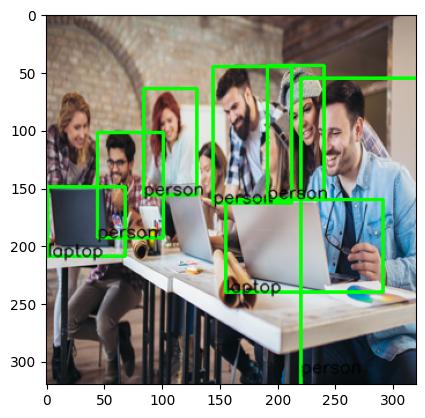

In [72]:
import cv2

newimg = ndimg[0].copy()
for i in range(int(output[3])):
  if output[2][i] < 0.5: # threshold 설정
    break
  print(labels[int(output[1][i])]) # array([ 0., 72., 72. 해당값 labels에서 찾기
  # print(i, output[0][i]) # 죄표값 가져오기, [ymin, xmin, ymax, xmax]
  ymin = int(max(1, output[0][i][0]*320)) # int 픽셀은 딱 떨어져야 함
  xmin = int(max(1, output[0][i][1]*320))
  ymax = int(output[0][i][2]*320)
  xmax = int(output[0][i][3]*320)
  # print(ymin, xmin, ymax, xmax)
  cv2.rectangle(newimg, (xmin, ymin), (xmax, ymax), (0,255,0), 2) # 그림판, 시작위치, 끝위치, 선 색, 선 굵기
  cv2.putText(newimg, labels[int(output[1][i])], (xmin, min(310, ymax)),
              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1,cv2.LINE_AA)
plt.imshow(newimg)
plt.show()

# 정규 표현식

In [77]:
import re
r=re.compile("a.c") # 사이에 어떤 1개의 문자로도 올수 있음
r.search("kkk")
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [79]:
r=re.compile("ab?c") # 앞의 문자가 존재할 수도 , 하지 않을 수도 있음
r.search("abbc")
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [84]:
r=re.compile("이루*리") # 앞의 문자가 0개 이상일 경우
r.search("이루루리")
r.search("이리")

<re.Match object; span=(0, 2), match='이리'>

In [88]:
r=re.compile("이루+리") # 앞의 문자가 1개 이상일 경우
r.search("이루루리")
r.search("이리")

In [94]:
r=re.compile("^이루") # 뒤의 문자로 시작되는 문자열만 찾음
r.search("이리")
r.search("이루리")

<re.Match object; span=(0, 2), match='이루'>

In [95]:
r=re.compile("ab{2}c") # 해당 문자를 숫자만큼 반복
r.search("ac")
r.search("abc")
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [96]:
r=re.compile("ab{2,4}c") # 해당 문자를 2 이상 4 이하만큼 반복
r.search("ac")
r.search("abc")
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

In [ ]:
r=re.compile("[abc]") # a또는 b또는 c가 들어가 있는 문자열 매치
r=re.compile("[a-zA-Z]") # 알파벳 전부를 의미
r=re.compile("[0-9]") # 숫자 전부를 의미

In [ ]:
r=re.compile("[^abc]") # ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치

In [97]:
r=re.compile("ab.")
r.search("kkkabc") # span=(3, 6) (시작, 끝)

<re.Match object; span=(3, 6), match='abc'>

In [98]:
r.match("kkkabc")

In [99]:
r.match("abckkk") # match는 문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
re.split('\s+', text) # 문자 분리, 공백을 찾아내는 정규표현식, +는 최소 1개 이상의 패턴

In [ ]:
re.findall('\d+', text) # 정규표현식과 매치되는 모든 문자열들을 리스트로 리턴, d는 digital 숫자를 의미

In [ ]:
re.sub('[^a-zA-Z]', ' ', text) # 일치하는 문자열을 찾아 다른 문자열로 대체, a-zA-Z가 아닌걸 공백으로 변환

# autoencoder

In [100]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data() # 이미지만 가져오고 데이터는 안 가져옴

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [108]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Reshape

encoder = Sequential()
encoder.add(Input(shape=(28,28)))
encoder.add(Flatten())
encoder.add(Dense(256))
encoder.add(Dense(64))
encoder.add(Dense(8))
encoder.summary()

decoder = Sequential()
decoder.add(Input(shape=(8,)))
decoder.add(Dense(64))
decoder.add(Dense(256))
decoder.add(Dense(28*28, activation='sigmoid')) # 원래 값 생성
decoder.add(Reshape((28,28)))
decoder.summary()

encoder_input = Input(shape=(28,28))
encoder_output = encoder(encoder_input)
decoder_output = decoder(encoder_output)
autoencoder = Model(encoder_input, decoder_output)
autoencoder.summary()

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
x_train_norm = x_train/255
x_test_norm = x_test/255
autoencoder.fit(x_train_norm, x_train_norm,
                validation_data=(x_test_norm, x_test_norm),
                epochs=10)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,928 (851.28 KB)

 Trainable params: 217,928 (851.28 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 784)            │       201,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,704 (854.31 KB)

 Trainable params: 218,704 (854.31 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_9 (Sequential)       │ (None, 8)              │       217,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (None, 28, 28)         │       218,704 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,632 (1.67 MB)

 Trainable params: 436,632 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.2007 - val_loss: 0.1648
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.1666 - val_loss: 0.1643
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.1662 - val_loss: 0.1644
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.1658 - val_loss: 0.1641
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.1659 - val_loss: 0.1640
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.1656 - val_loss: 0.1638
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.1653 - val_loss: 0.1637
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.1653 - val_loss: 0.1636
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.1654 - val_loss: 0.1636
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.1651 - val_loss: 0.1634


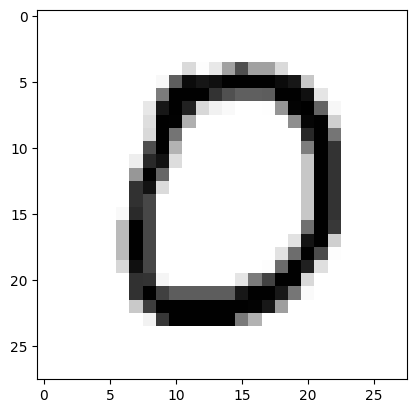

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


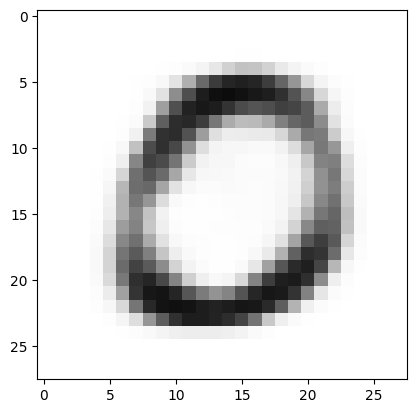

In [111]:
plt.imshow(x_test_norm[10], cmap='Greys', vmin=0, vmax=1) # 이 이미지가 들어가면
plt.show()
plt.imshow(autoencoder.predict(x_test_norm[10:11])[0], cmap='Greys', vmin=0, vmax=1) # 이렇게 복원해주는거임
plt.show()

In [113]:
code = encoder.predict(x_test_norm[10:11])
print(code)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[ 2.9434555   1.0865687  -0.6712743   4.443041   -1.5439444   0.15545955
  -0.5955492   2.0593643 ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


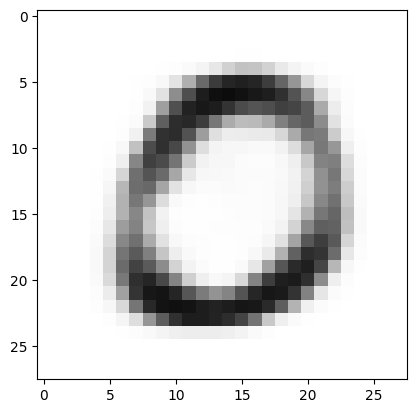

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


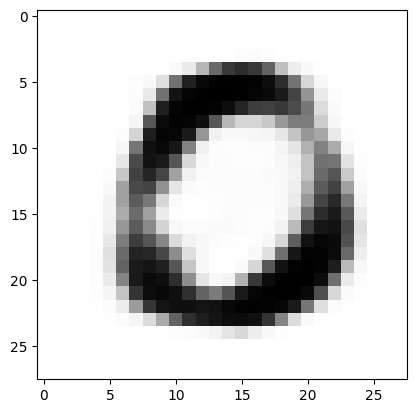

In [122]:
plt.imshow(decoder.predict(code)[0], cmap='Greys', vmin=0, vmax=1)
plt.show()
code1 = np.array(code) + 1 # latent vector의 값을 조작하여 생성 이미지를 바꾸는 것을 자유도라고 말했음
plt.imshow(decoder.predict(code1)[0], cmap='Greys', vmin=0, vmax=1) # 유사하지만 다른 값이 나옴
plt.show()

In [123]:
np.random.randn(8)

array([-1.3149477 , -0.34726041,  0.82628733,  0.4311377 , -0.49139245,
       -0.14050151,  0.12818384,  2.08445168])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


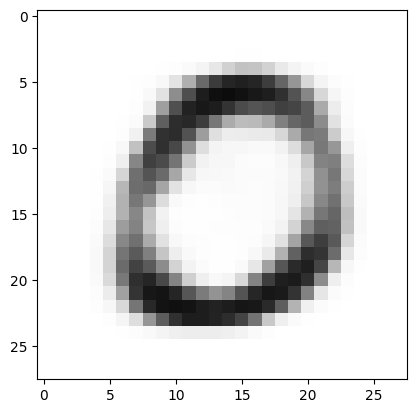

[[ 2.9434555   1.0865687  -0.6712743   4.443041   -1.5439444   0.15545955
  -0.5955492   2.0593643 ]]
(1, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


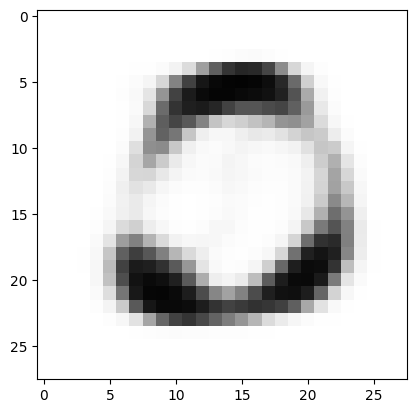

In [125]:
plt.imshow(decoder.predict(code)[0], cmap='Greys', vmin=0, vmax=1)
plt.show()
print(code)
code1 = np.array(code) + np.random.randn(8)
print(code1.shape)
plt.imshow(decoder.predict(code1)[0], cmap='Greys', vmin=0, vmax=1)
plt.show()